# 3. Geophysics NetCDF Line Data Utilities Demonstration
Extracts and graphs data along a single survey line by distance
Creates basic grid from line data

In [1]:
%matplotlib inline

In [2]:
import os
import netCDF4
import numpy as np
from geophys_utils import NetCDFLineUtils
import matplotlib.pyplot as plt

In [3]:
# Setup proxy as required
GA_STAFF_WIFI = False

if GA_STAFF_WIFI:
    os.environ['http_proxy'] = 'http://proxy.inno.lan:3128'
    os.environ['https_proxy'] = 'http://proxy.inno.lan:3128'

In [4]:
nc_path = "/iv65/Geoscience_Australia_Geophysics_Reference_Data_Collection/airborne_geophysics/SA/line/P1255/P1255-line-magnetic-Marree-AWAGS_MAG_2010.nc"
if not os.path.isfile(nc_path):
    nc_path = "https://dapds00.nci.org.au/thredds/dodsC/iv65/Geoscience_Australia_Geophysics_Reference_Data_Collection/airborne_geophysics/SA/line/P1255/P1255-line-magnetic-Marree-AWAGS_MAG_2010.nc"

bounds = (137, -29, 138, -28) # Spatial subset of dataset

In [5]:
# Initialise netCDF dataset object
nc_dataset = netCDF4.Dataset(nc_path + '#fillmismatch') # Note work-around for bad _FillValue: https://github.com/Unidata/netcdf-c/issues/1299

In [6]:
# Initialise NetCDFLineUtils object
# Code is at https://github.com/geoscienceaustralia/geophys_utils
netcdf_line_utils = NetCDFLineUtils(nc_dataset, debug=True)
#netcdf_line_utils.__dict__

In [7]:
# Test get_spatial_mask function and count the points within the bounding box
spatial_mask = netcdf_line_utils.get_spatial_mask(bounds)
np.count_nonzero(spatial_mask)

/srv/conda/envs/notebook/lib/python3.10/site-packages/osgeo/osr.py:385: FutureWarning: Neither osr.UseExceptions() nor osr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


4613089

In [8]:
# Count the points in a couple of lines
for line_number, line_mask in netcdf_line_utils.get_line_masks(line_numbers=[100060, 100070]):
    print('Line {} has {} points'.format(line_number, np.count_nonzero(line_mask)))

Line 100060 has 25373 points
Line 100070 has 27756 points


In [9]:
# Get all coordinates and data points for line 100060
line_number, line_dict = next(netcdf_line_utils.get_lines(line_numbers=100060))
#print(line_number, line_dict)

In [10]:
# Convert coordinates to UTM and compute cumulative distances in metres for line 100060
utm_distances = netcdf_line_utils.coords2metres(line_dict['coordinates'])
print(utm_distances)

[0.00000000e+00 5.98434645e+00 1.19686929e+01 ... 1.61925609e+05
 1.61932260e+05 1.61938799e+05]


mag_awagslevelled
mag_microlevelled
mag_tielevelled


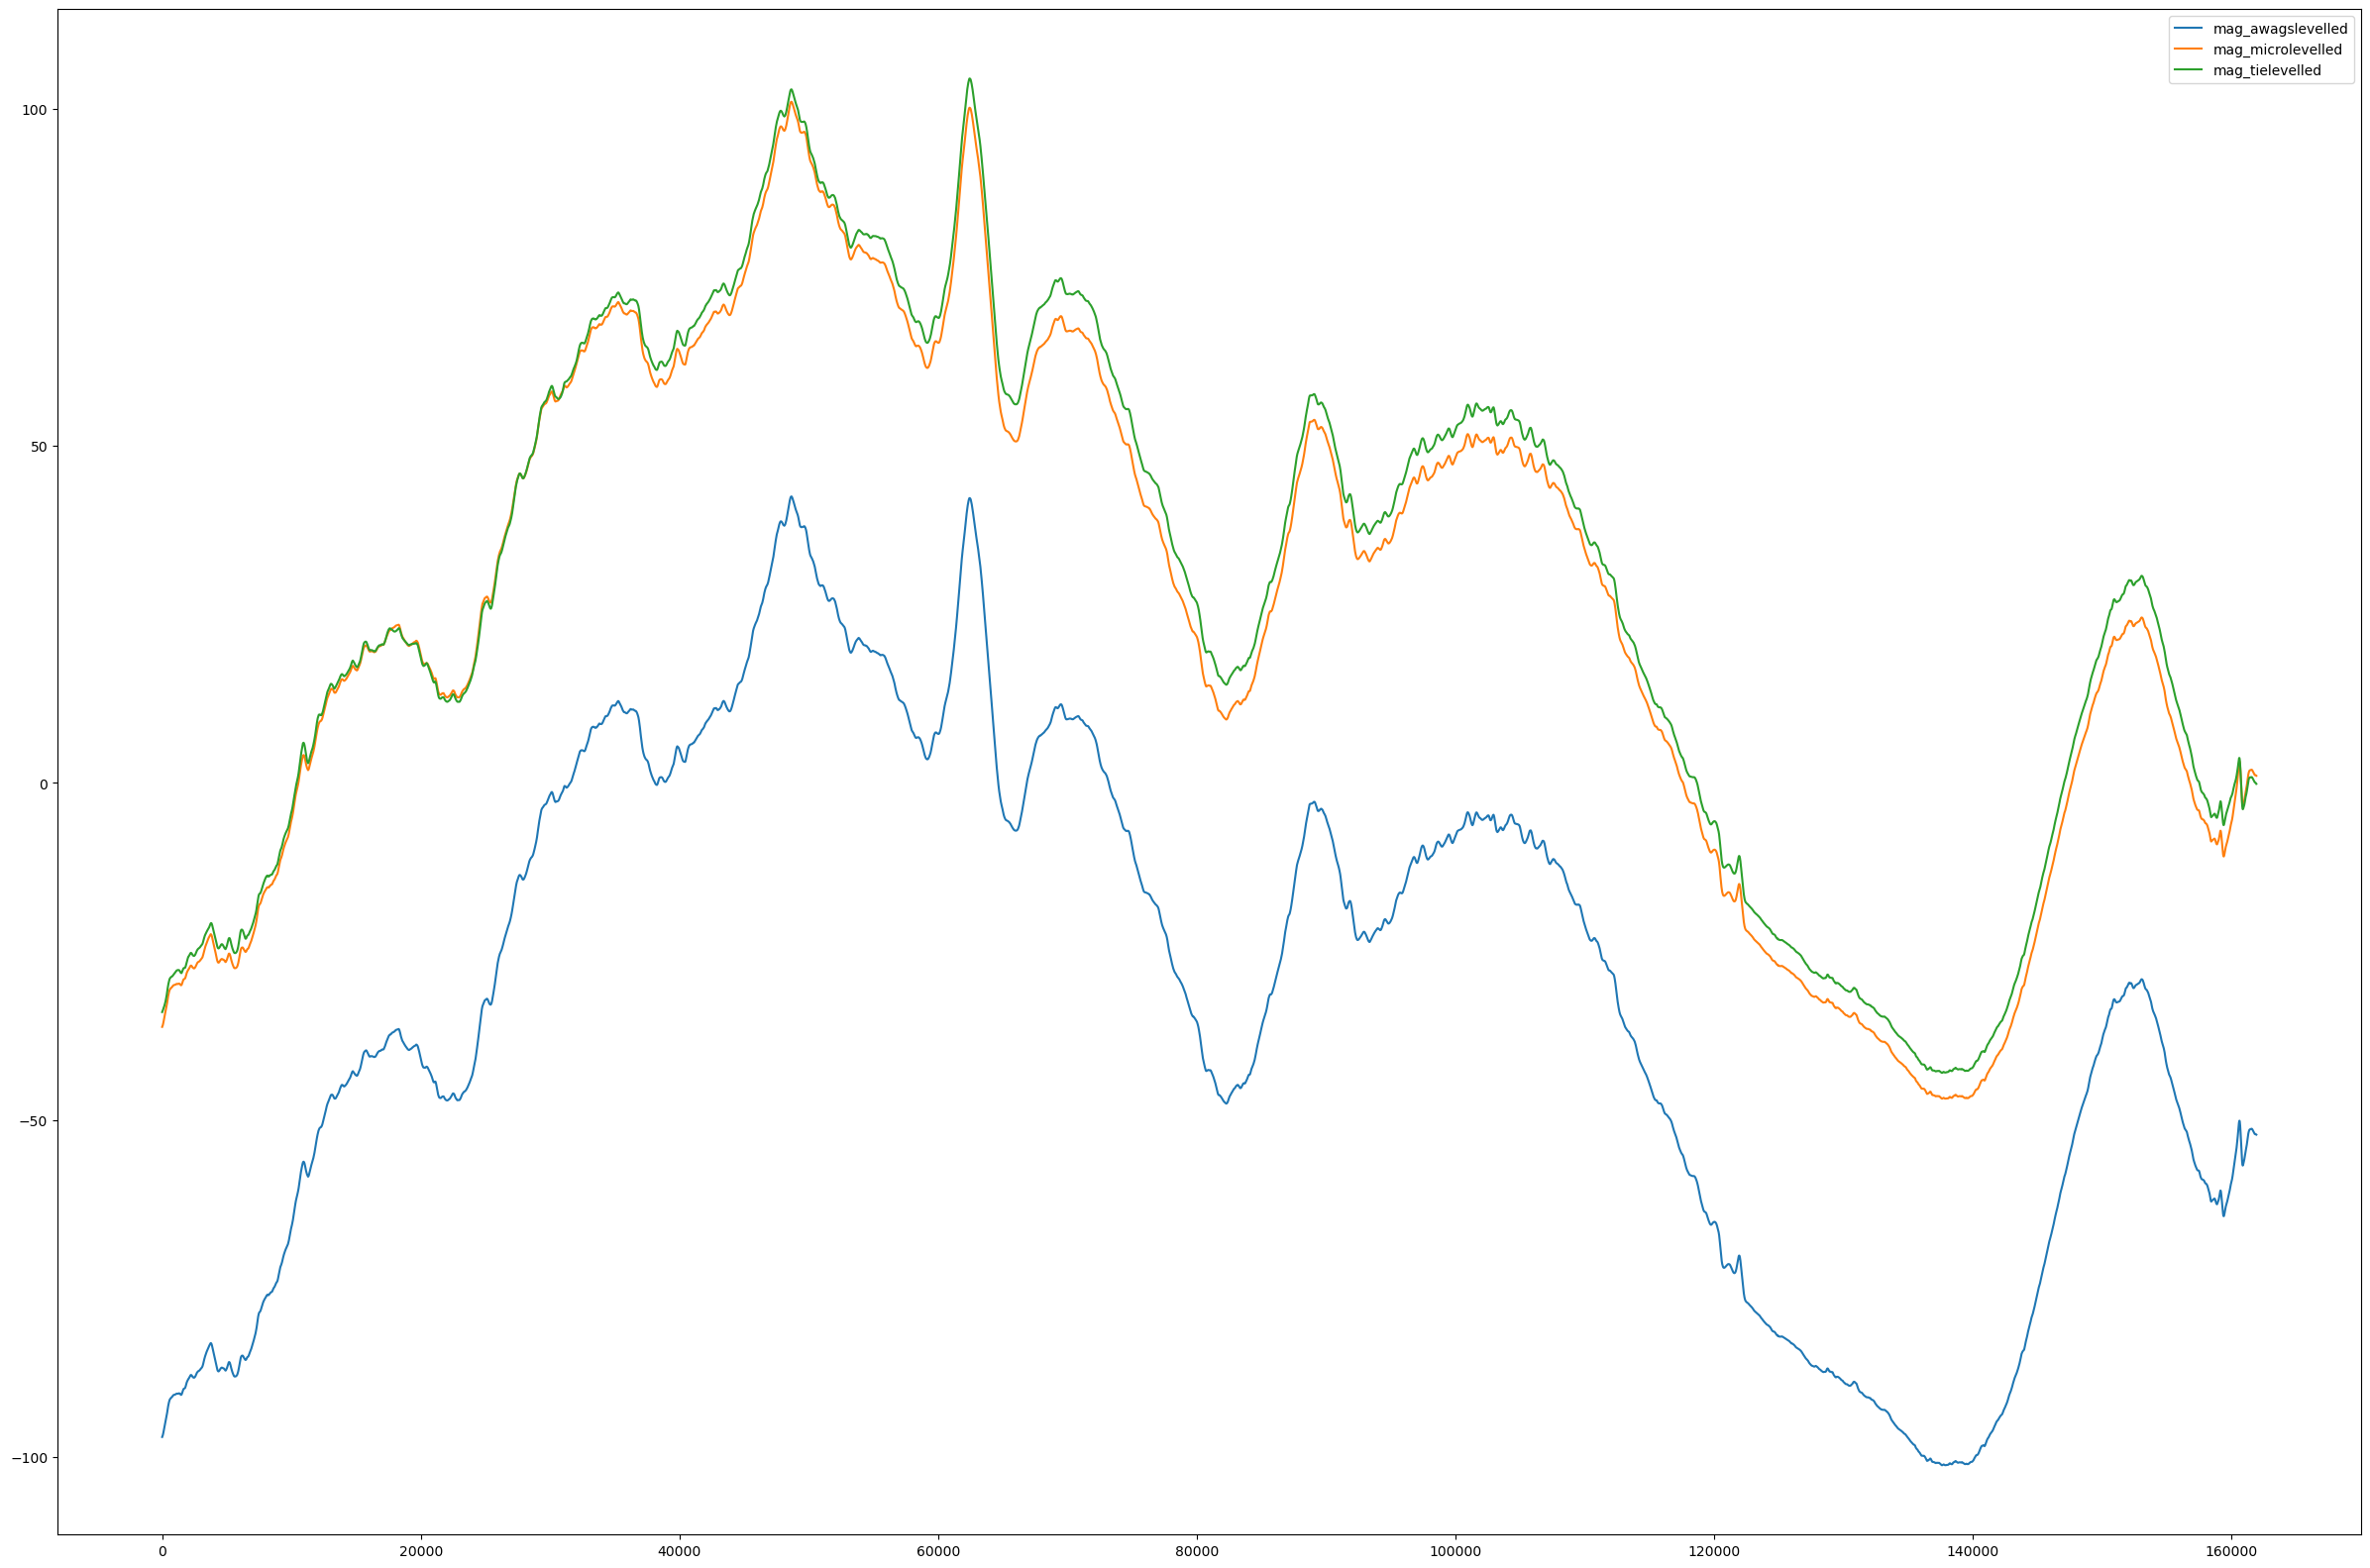

In [11]:
# Plot data points against line distance for line 100060
plt.figure(figsize=(30,20))   
for varname in line_dict.keys():
    if varname.startswith('mag_'):
        print(varname)
        plt.plot(utm_distances, line_dict[varname], label=varname)
plt.legend()

In [12]:
# Grid points to 100m resolution in UTM
utm_mag_awags_grid, crs, geotransform = netcdf_line_utils.utm_grid_points(utm_grid_resolution=100.0, 
                                               variables='mag_awagslevelled', 
                                               native_grid_bounds=bounds,
                                               point_step=1)
print(crs)
print(geotransform)
print(utm_mag_awags_grid.shape)

PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",135],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
[694750.0, 100.0, 0, 6901150.0, 0, -100.0]
(1129, 1003)


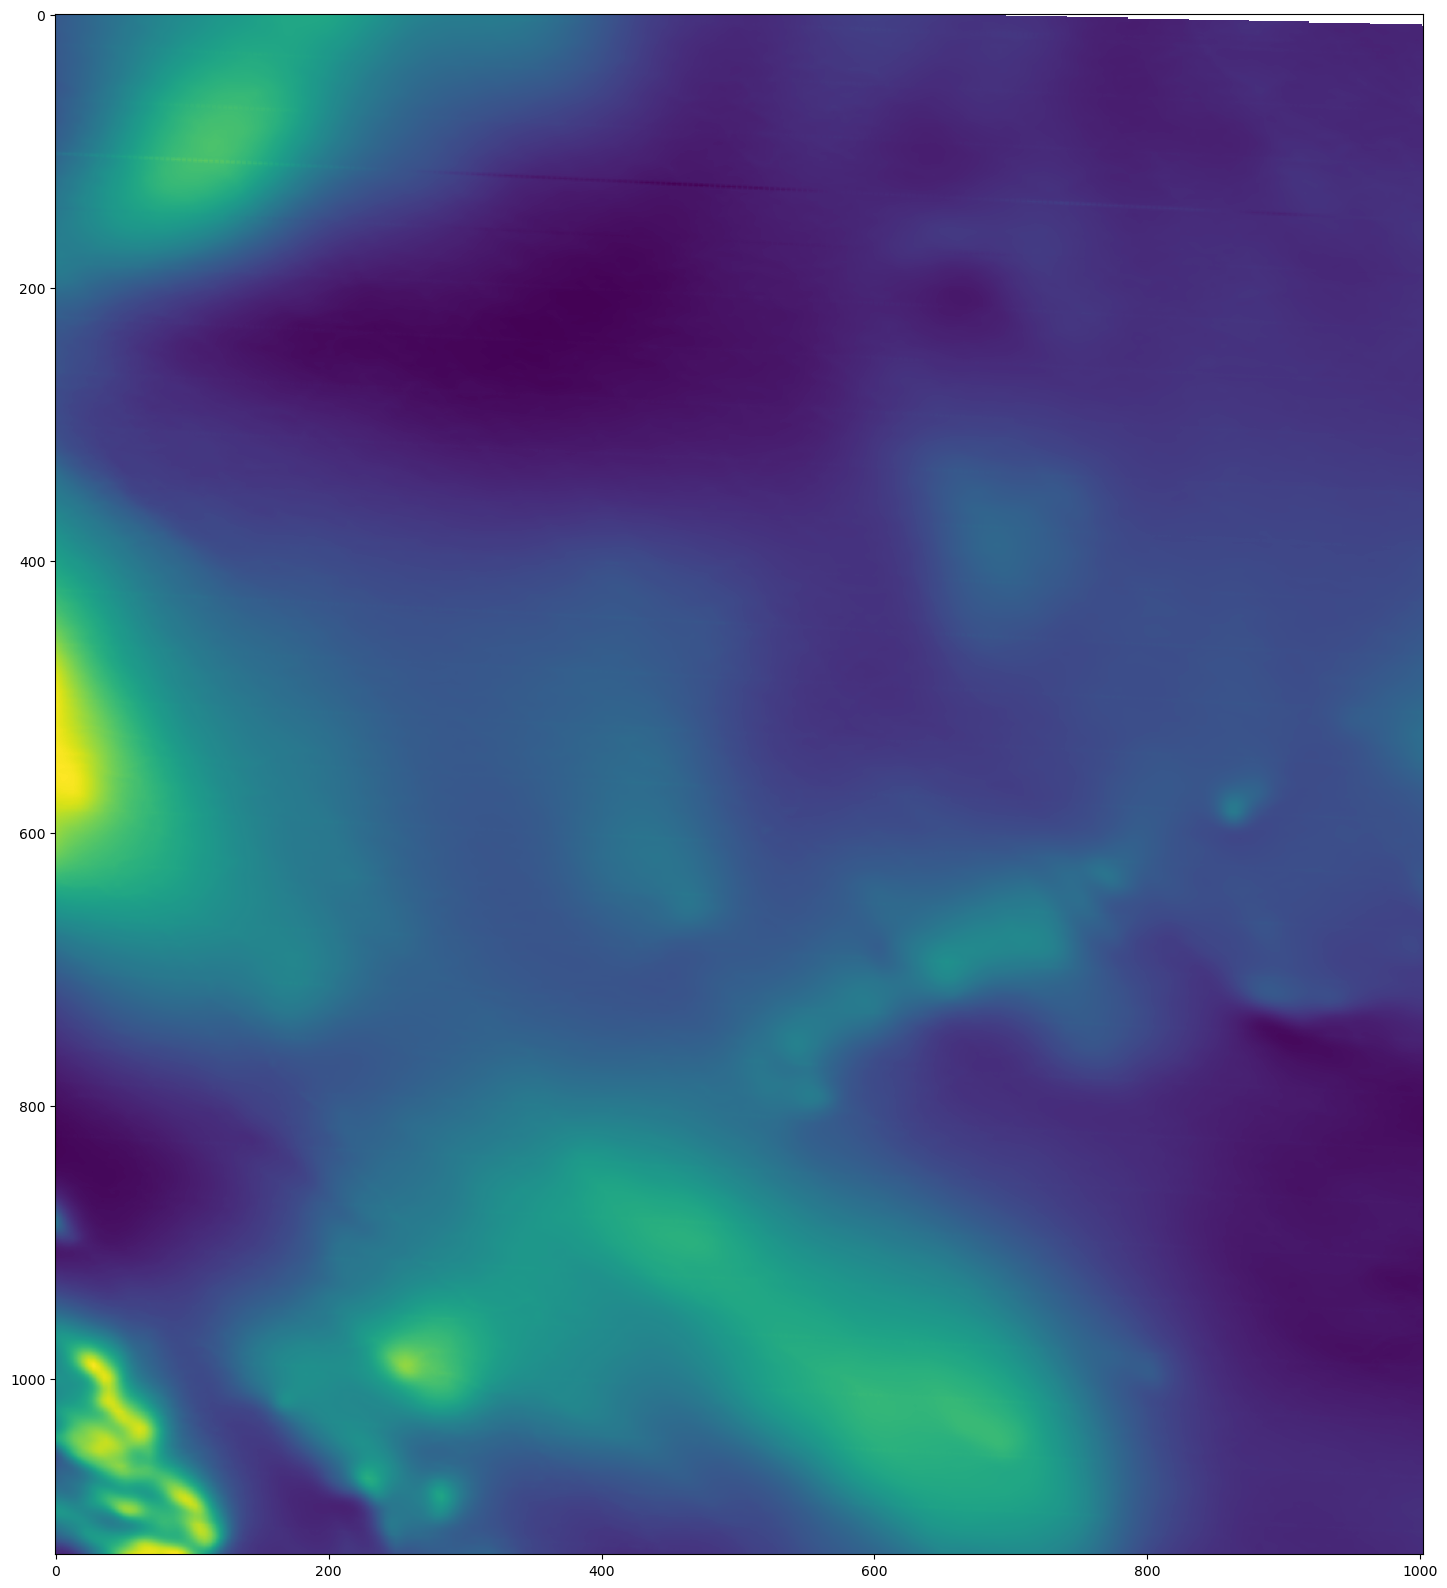

In [13]:
plt.figure(figsize=(30,20))    
plt.imshow(utm_mag_awags_grid)